# Анализ выручки по яндексу

#### Импорты

In [1]:
import pandas as pd
import re
pd.options.mode.chained_assignment = None
import datetime
import numpy as np
import os
import matplotlib.pyplot as plt
import glob

#### Пути к файлам

In [2]:
PATH = [
    
     {'path_downloads': '/Users/macbook/Library/CloudStorage/GoogleDrive-maslowdmitry92@gmail.com/Мой диск/Загрузки Маслов/',
      'path_algoritm': '/Users/macbook/Library/CloudStorage/GoogleDrive-maslowdmitry92@gmail.com/Мой диск/Алгоритмы Маслов/'} ,
     
     {'path_downloads': '/Users/dmitriymaslov/Мой диск/Загрузки Маслов/',
      'path_algoritm': '/Users/dmitriymaslov/Мой диск/Алгоритмы Маслов/'}
     
    ]
         
i = 0
while len([py for py in glob.glob(f"{PATH[i]['path_downloads']}*.xlsx")]) == 0:
    i +=1

path_downloads = PATH[i]['path_downloads']
path_algoritm = PATH[i]['path_algoritm']

print(f"Загрузки: {path_downloads}")
print(f"Папка с алгоритмом: {path_algoritm}")

Загрузки: /Users/dmitriymaslov/Мой диск/Загрузки Маслов/
Папка с алгоритмом: /Users/dmitriymaslov/Мой диск/Алгоритмы Маслов/


In [3]:
# N = 90

In [4]:
def dt_col(data):
    date_col = []
    for row in data.columns:
        try:
            pd.to_datetime(row)
            date_col.append(row)
        except:
            None
    return date_col

In [5]:
# файл с метриками по ценам

path_ya_price_metrics = path_algoritm + 'YANDEX_ORDERS/ya_price_metrics.xlsx'

In [6]:
## файл с метриками общими, YANDEX заказы (orders_metrics!)

path_file3 = path_algoritm + 'YANDEX_ORDERS/yandex_orders_metrics!.csv'

In [7]:
ym = pd.read_csv(path_file3, sep=';')
ym['Артикул'] = ym['Артикул'].astype(str)

In [8]:
yp = pd.read_excel(path_ya_price_metrics)
yp['Артикул'] = yp['Артикул'].astype(str)

In [9]:
p = ym[['Артикул', 'Цена']].copy()

In [10]:
yv = ym.copy()
yv = yv[['Артикул'] + dt_col(yv)]

In [11]:
ym

,Артикул,Название,Номенклатура,07-January-2022,08-January-2022,09-January-2022,10-January-2022,11-January-2022,12-January-2022,13-January-2022,...,23-July-2023,24-July-2023,25-July-2023,26-July-2023,27-July-2023,28-July-2023,29-July-2023,30-July-2023,Остаток,Цена
0,16801,Чехол книжка-подставка Smart Case для iPad 9.7...,нет,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,649
1,16802,Чехол книжка-подставка Smart Case для iPad 9.7...,нет,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,649
2,16803,Чехол книжка-подставка Smart Case для iPad 9.7...,нет,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,722
3,16804,Чехол книжка-подставка Smart Case для iPad 9.7...,нет,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,601
4,18301,"Чехол для Apple AirPods 2 с карабином, белый",стоп,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,3,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,18710,"Микрофон петличный беспроводной для айфона, SS...",102085405361,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,9,1000
642,18711,"Микрофон петличный беспроводной для андроид, S...",102085405362,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,1000
643,25010,"Аппарат для маникюра и педикюра, REVOLUT, Маши...",101988382279,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,1100
644,A1603,"Эспандер кистевой, Shark Fit, Набор эспандеров...",102008444756,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,999


In [12]:
yv = yv.query(f"index in {list(filter(lambda x: yv.iloc[x, 1:].sum() > 0, list(yv.index)))}").sort_values(by='Артикул').reset_index(drop=True)

In [13]:
yv

,Артикул,07-January-2022,08-January-2022,09-January-2022,10-January-2022,11-January-2022,12-January-2022,13-January-2022,14-January-2022,15-January-2022,...,21-July-2023,22-July-2023,23-July-2023,24-July-2023,25-July-2023,26-July-2023,27-July-2023,28-July-2023,29-July-2023,30-July-2023
0,16930,0,0,0,0,0,0,0,0,0,...,0,1,0,2,1,0,3,0,1,1
1,16950,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16951,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,16970,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2,2
4,17000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,Z0202,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
553,Z0210,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,1,0,1
554,Z0220,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
555,Z0230,0,0,0,0,0,0,0,0,0,...,1,0,0,2,1,1,1,0,0,0


In [14]:
p = p.query(f"Артикул in {list(set(yv['Артикул']))}").sort_values(by='Артикул').reset_index(drop=True)

In [15]:
p

,Артикул,Цена
0,16930,890
1,16950,1325
2,16951,1425
3,16970,1299
4,17000,1500
...,...,...
552,Z0202,2599
553,Z0210,799
554,Z0220,479
555,Z0230,249


In [16]:
for col in yv.columns[1:]:
    yv[col] = yv[col] * p['Цена']

In [17]:
yvd = yv.copy()

yvd.loc[len(yvd)] = ['Итого'] + list(map(lambda x: yvd[x].sum(), list(yvd.columns[1:])))

In [18]:
yvd = yvd.loc[len(yvd)-1:len(yvd)-1]

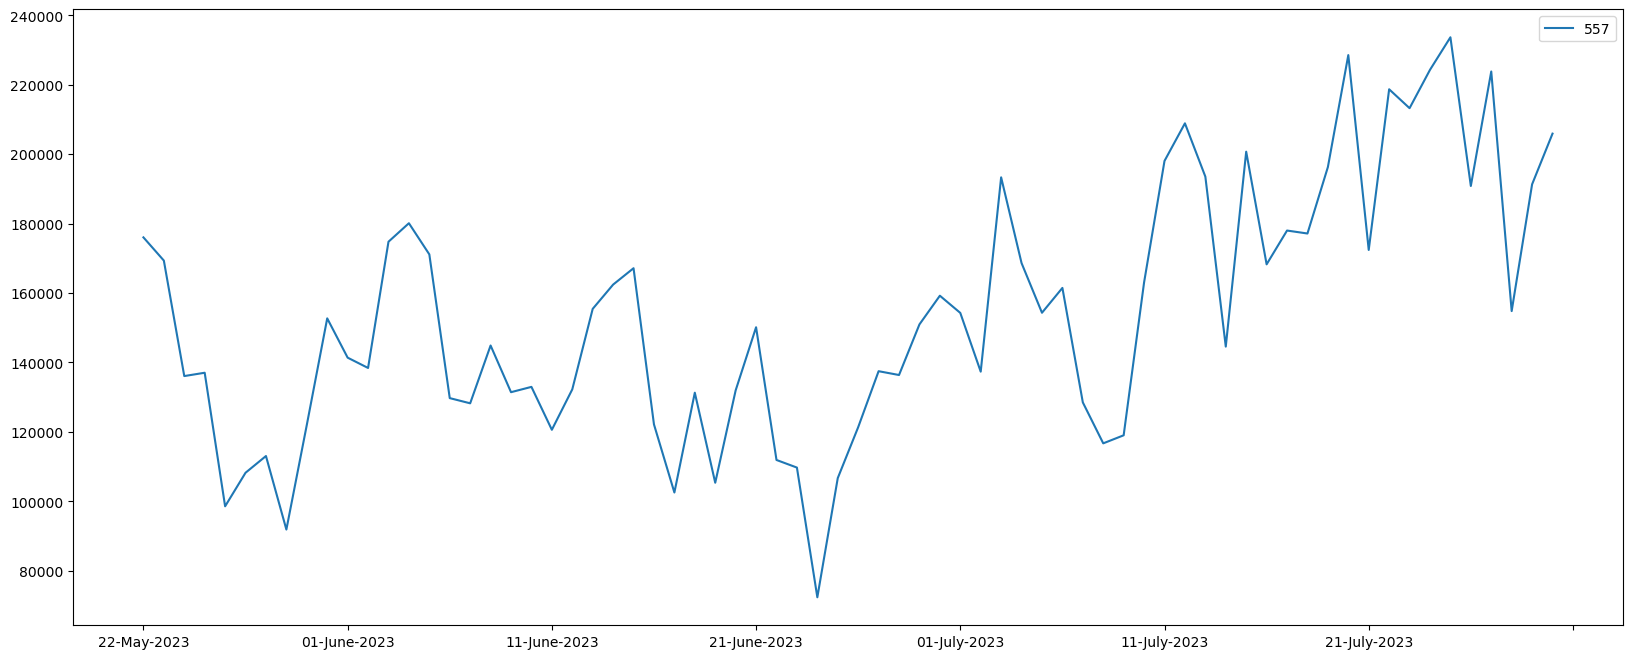

In [19]:
yvd.iloc[:, -70:].T.plot(figsize=(20, 8))
plt.show()

In [20]:
yv1 = yv[['Артикул'] + list(yv.columns[yv.columns.get_loc('27-February-2023'):yv.columns.get_loc('01-April-2023')])]

In [21]:
yv2 = yv[['Артикул'] + list(yv.columns[yv.columns.get_loc('01-April-2023'):])]

In [22]:
yv1['mean_v']  = list(map(lambda x: yv1.iloc[x, 1:].mean(), list(yv1.index)))

In [23]:
yv1['mean_v']  = list(map(lambda x: yv1.iloc[x, 1:].mean(), list(yv1.index)))
yv2['mean_v']  = list(map(lambda x: yv2.iloc[x, 1:].mean(), list(yv2.index)))
yv1['sum_v']  = list(map(lambda x: yv1.iloc[x, 1:-1].sum(), list(yv1.index)))
yv2['sum_v']  = list(map(lambda x: yv2.iloc[x, 1:-1].sum(), list(yv2.index)))

In [24]:
yv1 = yv1.query(f"index in {list(filter(lambda x: yv1.iloc[x, 1:].sum() > 0, list(yv1.index)))}").reset_index(drop=True)
yv2 = yv2.query(f"index in {list(filter(lambda x: yv2.iloc[x, 1:].sum() > 0, list(yv2.index)))}").reset_index(drop=True)

In [25]:
# yv1['mean_v_%'] = list(map(lambda x: (yv1.loc[x]['mean_v'] * 100) / yv1['mean_v'].sum(), list(yv1.index) ))
yv1['v_%'] = list(map(lambda x: (yv1.loc[x]['sum_v'] * 100) / yv1['sum_v'].sum(), list(yv1.index) ))

# yv2['mean_v_%'] = list(map(lambda x: (yv2.loc[x]['mean_v'] * 100) / yv2['mean_v'].sum(), list(yv2.index) ))
yv2['v_%'] = list(map(lambda x: (yv2.loc[x]['sum_v'] * 100) / yv2['sum_v'].sum(), list(yv2.index) ))

In [26]:
yv1 = yv1.sort_values(by='v_%', ascending=False).reset_index(drop=True)
yv2 = yv2.sort_values(by='v_%', ascending=False).reset_index(drop=True)

In [27]:
yvd_2 = yvd[['Артикул'] + list(filter(lambda x: yvd[x].values[0] >= 250000, list(yvd.columns[1:])))]

In [28]:
yvd_2

,Артикул,21-February-2023,27-February-2023,05-March-2023,06-April-2023,18-April-2023
557,Итого,261786,270041,252711,267301,284054


In [29]:
yv1

,Артикул,27-February-2023,28-February-2023,01-March-2023,02-March-2023,03-March-2023,04-March-2023,05-March-2023,06-March-2023,07-March-2023,...,25-March-2023,26-March-2023,27-March-2023,28-March-2023,29-March-2023,30-March-2023,31-March-2023,mean_v,sum_v,v_%
0,A5502,53730,43780,23880,11940,21890,23880,27860,13930,19900,...,0,0,5970,3980,7960,5970,0,11698.787879,386060,6.833679
1,A5501,65100,17050,1550,0,3100,0,0,0,0,...,1550,4650,4650,6200,3100,4650,3100,4931.818182,162750,2.880851
2,20200,4950,4950,8100,5550,7050,10950,9900,7800,6900,...,2550,4050,3600,600,1200,1800,2850,4818.181818,159000,2.814472
3,A2502,3990,2660,0,5320,3990,6650,1330,1330,5320,...,6650,5320,10640,6650,2660,6650,10640,4433.333333,146300,2.589668
4,22800,1199,7194,3597,7194,3597,0,0,0,0,...,3597,3597,16786,5995,3597,5995,9592,3851.333333,127094,2.249701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,18903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.121212,169,0.002991
340,18901,0,0,0,0,0,0,0,0,0,...,169,0,0,0,0,0,0,5.121212,169,0.002991
341,50900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,169,5.121212,169,0.002991
342,26009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.121212,169,0.002991


In [30]:
yv2_2 = yv2.query(f"Артикул in {list(yv1.iloc[:N, :]['Артикул'].values)}").reset_index(drop=False)

NameError: name 'N' is not defined

In [70]:
yv2_2

NameError: name 'yv2_2' is not defined

In [138]:
yv = pd.concat([yv, yvd], ignore_index=True)

In [139]:
yv = yv.query(f"index in {list(filter(lambda x: yv.iloc[x, 1:].sum() > 0, list(yv.index)))}").reset_index(drop=True)

In [140]:
yvd_2

,Артикул,21-February-2023,27-February-2023,05-March-2023,06-April-2023,18-April-2023
640,Итого,265717,277446,256359,270415,288753


In [141]:
yv1

,Артикул,27-February-2023,28-February-2023,01-March-2023,02-March-2023,03-March-2023,04-March-2023,05-March-2023,06-March-2023,07-March-2023,...,25-March-2023,26-March-2023,27-March-2023,28-March-2023,29-March-2023,30-March-2023,31-March-2023,mean_v,sum_v,v_%
0,A5502,56700,46200,25200,12600,23100,25200,29400,14700,21000,...,0,0,6300,4200,8400,6300,0,12345.454545,407400,7.064339
1,A2502,4830,3220,0,6440,4830,8050,1610,1610,6440,...,8050,6440,12880,8050,3220,8050,12880,5366.666667,177100,3.070924
2,A5501,67620,17710,1610,0,3220,0,0,0,0,...,1610,4830,4830,6440,3220,4830,3220,5122.727273,169050,2.931336
3,20200,4950,4950,8100,5550,7050,10950,9900,7800,6900,...,2550,4050,3600,600,1200,1800,2850,4818.181818,159000,2.757069
4,22800,1199,7194,3597,7194,3597,0,0,0,0,...,3597,3597,16786,5995,3597,5995,9592,3851.333333,127094,2.203817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,26000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,169,5.121212,169,0.002930
340,50900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,169,5.121212,169,0.002930
341,18901,0,0,0,0,0,0,0,0,0,...,169,0,0,0,0,0,0,5.121212,169,0.002930
342,18903,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.121212,169,0.002930


In [142]:
yv2

,Артикул,01-April-2023,02-April-2023,03-April-2023,04-April-2023,05-April-2023,06-April-2023,07-April-2023,08-April-2023,09-April-2023,...,04-July-2023,05-July-2023,06-July-2023,07-July-2023,08-July-2023,09-July-2023,10-July-2023,mean_v,sum_v,v_%
0,20503,0,0,0,0,5099,5099,10198,10198,20396,...,20396,0,0,15297,0,10198,20396,8330.049505,841335,5.470950
1,A8301,4178,4178,4178,16712,0,8356,4178,2089,14623,...,2089,4178,6267,2089,0,4178,2089,6556.564356,662213,4.306173
2,A5501,8050,6440,4830,4830,8050,8050,9660,8050,6440,...,6440,6440,8050,3220,0,0,0,5196.633663,524860,3.413008
3,A5502,0,8400,6300,4200,4200,8400,4200,10500,8400,...,2100,4200,2100,6300,0,0,0,5135.643564,518700,3.372951
4,22800,8393,8393,10791,1199,5995,9592,4796,5995,1199,...,4796,3597,4796,2398,1199,3597,0,4297.405941,434038,2.822420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,A1301,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.950495,399,0.002595
468,H0143,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.752475,379,0.002465
469,22702,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3.564356,360,0.002341
470,G0360,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,179,0,1.772277,179,0.001164


In [143]:
yv2_2 

,index,Артикул,01-April-2023,02-April-2023,03-April-2023,04-April-2023,05-April-2023,06-April-2023,07-April-2023,08-April-2023,...,04-July-2023,05-July-2023,06-July-2023,07-July-2023,08-July-2023,09-July-2023,10-July-2023,mean_v,sum_v,v_%
0,0,20503,0,0,0,0,5099,5099,10198,10198,...,20396,0,0,15297,0,10198,20396,8330.049505,841335,5.470950
1,1,A8301,4178,4178,4178,16712,0,8356,4178,2089,...,2089,4178,6267,2089,0,4178,2089,6556.564356,662213,4.306173
2,2,A5501,8050,6440,4830,4830,8050,8050,9660,8050,...,6440,6440,8050,3220,0,0,0,5196.633663,524860,3.413008
3,3,A5502,0,8400,6300,4200,4200,8400,4200,10500,...,2100,4200,2100,6300,0,0,0,5135.643564,518700,3.372951
4,4,22800,8393,8393,10791,1199,5995,9592,4796,5995,...,4796,3597,4796,2398,1199,3597,0,4297.405941,434038,2.822420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,231,50355,1198,2396,1797,0,0,0,599,0,...,0,0,0,599,0,599,0,124.544554,12579,0.081797
84,239,27901,798,798,1596,0,399,0,0,0,...,0,0,0,0,0,0,0,118.514851,11970,0.077837
85,269,D0011,0,870,290,580,580,1740,1740,580,...,0,0,0,0,0,0,0,91.881188,9280,0.060345
86,413,A2201,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,17.792079,1797,0.011685


In [144]:
yv1_1 = yv1.copy()
yv1_1 = yv1_1[['Артикул']+list(yv1_1.columns[-3:])]

In [145]:
yv1_1.columns = ['Артикул', 'mean_v было', 'sum_v было', 'v_% было']

In [146]:
yv2_2 = yv2_2.merge(yv1_1, on='Артикул', how='left')

In [147]:
yv2_2 = yv2_2.rename(columns={'index': 'Прошлая позиция'})
yv2_2['Новая позиция'] = yv2_2.index
yv2_2['Новая позиция'] = yv2_2['Новая позиция'] + 1
yv2_2['Прошлая позиция'] = yv2_2['Прошлая позиция'] + 1

In [148]:
yv2_2 = yv2_2[list(yv2_2.columns[1:])+['Прошлая позиция']]

In [149]:
yv2_2 

,Артикул,01-April-2023,02-April-2023,03-April-2023,04-April-2023,05-April-2023,06-April-2023,07-April-2023,08-April-2023,09-April-2023,...,09-July-2023,10-July-2023,mean_v,sum_v,v_%,mean_v было,sum_v было,v_% было,Новая позиция,Прошлая позиция
0,20503,0,0,0,0,5099,5099,10198,10198,20396,...,10198,20396,8330.049505,841335,5.470950,3244.818182,107079,1.856756,1,1
1,A8301,4178,4178,4178,16712,0,8356,4178,2089,14623,...,4178,2089,6556.564356,662213,4.306173,3481.666667,114895,1.992286,2,2
2,A5501,8050,6440,4830,4830,8050,8050,9660,8050,6440,...,0,0,5196.633663,524860,3.413008,5122.727273,169050,2.931336,3,3
3,A5502,0,8400,6300,4200,4200,8400,4200,10500,8400,...,0,0,5135.643564,518700,3.372951,12345.454545,407400,7.064339,4,4
4,22800,8393,8393,10791,1199,5995,9592,4796,5995,1199,...,3597,0,4297.405941,434038,2.822420,3851.333333,127094,2.203817,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,50355,1198,2396,1797,0,0,0,599,0,0,...,599,0,124.544554,12579,0.081797,907.575758,29950,0.519335,84,232
84,27901,798,798,1596,0,399,0,0,0,0,...,0,0,118.514851,11970,0.077837,749.636364,24738,0.428958,85,240
85,D0011,0,870,290,580,580,1740,1740,580,0,...,0,0,91.881188,9280,0.060345,1080.909091,35670,0.618520,86,270
86,A2201,0,0,0,0,0,0,0,0,0,...,0,0,17.792079,1797,0.011685,1143.545455,37737,0.654362,87,414


In [39]:
def unloading():
    
    with pd.ExcelWriter(path_algoritm + "Анализ выручки по яндексу.xlsx") as writer:




        yv.to_excel(writer, sheet_name="Выручка", index=False)
        for column in yv:
            column_width = max(yv[column].astype(str).map(len).max()+5, len(column))
            col_idx = yv.columns.get_loc(column)
            writer.sheets['Выручка'].set_column(col_idx, col_idx, column_width)



        yvd_2.to_excel(writer, sheet_name="Выручка больше 250к", index=False)
        for column in yvd_2:
            column_width = max(yvd_2[column].astype(str).map(len).max()+5, len(column))
            col_idx = yvd_2.columns.get_loc(column)
            writer.sheets['Выручка больше 250к'].set_column(col_idx, col_idx, column_width)


        yv1.to_excel(writer, sheet_name="Анализ выручки, начало марта", index=False)
        for column in yv1:
            column_width = max(yv1[column].astype(str).map(len).max()+5, len(column))
            col_idx = yv1.columns.get_loc(column)
            writer.sheets['Анализ выручки, начало марта'].set_column(col_idx, col_idx, column_width)



        yv2.to_excel(writer, sheet_name="Анализ выручки, конец марта", index=False)
        for column in yv2:
            column_width = max(yv2[column].astype(str).map(len).max()+5, len(column))
            col_idx = yv2.columns.get_loc(column)
            writer.sheets['Анализ выручки, конец марта'].set_column(col_idx, col_idx, column_width)



        yv2_2.to_excel(writer, sheet_name="Сравнение", index=False)
        for column in yv2_2:
            column_width = max(yv2_2[column].astype(str).map(len).max()+5, len(column))
            col_idx = yv2_2.columns.get_loc(column)
            writer.sheets['Сравнение'].set_column(col_idx, col_idx, column_width)





    writer.save()

/Users/dmitriymaslov/opt/anaconda3/lib/python3.9/site-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [ ]:
try:
    unloading()
except:
    unloading()